In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# just prep the TOP:Se for overnight

In [3]:
def columns_isolate(df, keyword):
    columns = df.columns 
    col_keys = [col for col in columns if keyword in col]
    col_values = df[col_keys]
    return col_keys, col_values

In [4]:
# First load in info and append the DLS info
sample_info = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\07_29_21_Octadecane_Info_pt2")
sample_info_expanded = sample_info.iloc[np.arange(len(sample_info)).repeat(2)]
sample_info_expanded.reset_index(inplace=True, drop=True)
sample_info_expanded.columns = sample_info.columns
dls_data = pd.read_csv(r"C:\Users\Public\Documents\Malvern Instruments\Zetasizer\Export Data\07_29_21_Octadecane_dls_export_pt2.txt")

In [5]:
well_info = [s[0].split('(', 1)[1].split(')')[0] for s in list(dls_data.index)]
wells = [info[1:4].replace('0','') for info in well_info]
plate = [info[0] for info in well_info]
aliquot = [info[-1:] for info in well_info]
run = [s[0][-1:] for s in list(dls_data.index)]
dls_data.insert(0, 'Run', run)
dls_data.insert(0, 'Aliquot', aliquot)
dls_data.insert(0, 'Well', wells)
dls_data.insert(0, 'Plate', plate)
dls_data.reset_index(inplace=True,drop=True)

In [6]:
data = pd.concat([sample_info_expanded, dls_data], axis=1)
data

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,Intensities[61] (Percent),Intensities[62] (Percent),Intensities[63] (Percent),Intensities[64] (Percent),Intensities[65] (Percent),Intensities[66] (Percent),Intensities[67] (Percent),Intensities[68] (Percent),Intensities[69] (Percent),Intensities[70] (Percent)
0,S2_D1_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,D1,0.000,0.0005,0.3,0.6995,0.0000,0.000000,...,0.0,0.0,1.0,3.4,6.8,10.3,0.0,0.0,0.0,0.0
1,S2_D1_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,D1,0.000,0.0005,0.3,0.6995,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S2_D2_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,D2,0.000,0.0005,0.5,0.4995,0.0000,0.000000,...,0.0,0.0,0.0,1.4,5.1,10.0,0.0,0.0,0.0,0.0
3,S2_D2_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,D2,0.000,0.0005,0.5,0.4995,0.0000,0.000000,...,0.0,0.0,0.1,1.1,3.1,5.4,0.0,0.0,0.0,0.0
4,S2_D3_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,D3,0.000,0.0005,0.7,0.2995,0.0000,0.000000,...,0.0,0.4,1.9,4.6,7.9,10.8,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,S2_F8_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F8,0.001,0.0005,0.3,0.6985,0.0012,1.544402,...,0.0,0.0,0.0,0.3,0.9,1.7,0.0,0.0,0.0,0.0
64,S2_F9_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F9,0.001,0.0005,0.5,0.4985,0.0012,1.544402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,S2_F9_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F9,0.001,0.0005,0.5,0.4985,0.0012,1.544402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,S2_F10_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F10,0.001,0.0005,0.7,0.2985,0.0012,1.544402,...,0.0,0.4,1.7,3.9,6.6,8.9,0.0,0.0,0.0,0.0


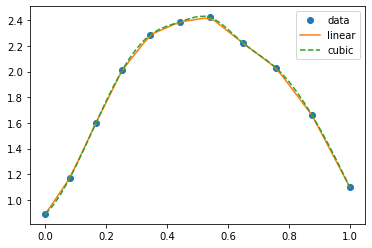

In [7]:
viscosity_data = pd.read_csv(r"Ethanol_Water_Viscosity.csv")
ethanol_mass_frac = viscosity_data['Mass fraction Ethanol']
viscosities = viscosity_data['Viscosity (cP)']
x = ethanol_mass_frac
y = viscosities
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 1, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')


In [8]:
size_cols, sizes = columns_isolate(data, 'Sizes')
intensity_cols, intensities = columns_isolate(data,'Intensities')
original_viscosities = list(data['Viscosity (cP)'])
corrected_viscosities = f2(data['ethanol concentration wtf'])
correction_factor = original_viscosities/corrected_viscosities

In [9]:
sizes_fixed_viscosity = sizes.mul(correction_factor, axis=0)
sizes_fixed_viscosity

,Sizes[1] (d.nm),Sizes[2] (d.nm),Sizes[3] (d.nm),Sizes[4] (d.nm),Sizes[5] (d.nm),Sizes[6] (d.nm),Sizes[7] (d.nm),Sizes[8] (d.nm),Sizes[9] (d.nm),Sizes[10] (d.nm),...,Sizes[61] (d.nm),Sizes[62] (d.nm),Sizes[63] (d.nm),Sizes[64] (d.nm),Sizes[65] (d.nm),Sizes[66] (d.nm),Sizes[67] (d.nm),Sizes[68] (d.nm),Sizes[69] (d.nm),Sizes[70] (d.nm)
0,0.381201,0.441430,0.511285,0.592100,0.685685,0.794041,0.919551,1.064503,1.233184,1.428550,...,2543.561904,2945.728679,3411.746578,3950.192616,4575.361821,5298.690216,6136.378831,7105.581699,8229.170866,9530.018374
1,0.381201,0.441430,0.511285,0.592100,0.685685,0.794041,0.919551,1.064503,1.233184,1.428550,...,2543.561904,2945.728679,3411.746578,3950.192616,4575.361821,5298.690216,6136.378831,7105.581699,8229.170866,9530.018374
2,0.342150,0.396210,0.458909,0.531444,0.615442,0.712698,0.825351,0.955454,1.106855,1.282207,...,2282.995874,2643.964123,3062.242498,3545.529373,4106.655373,4755.884997,5507.759622,6377.675996,7386.163121,8553.749995
3,0.342150,0.396210,0.458909,0.531444,0.615442,0.712698,0.825351,0.955454,1.106855,1.282207,...,2282.995874,2643.964123,3062.242498,3545.529373,4106.655373,4755.884997,5507.759622,6377.675996,7386.163121,8553.749995
4,0.389480,0.451018,0.522390,0.604960,0.700577,0.811287,0.939523,1.087623,1.259968,1.459577,...,2598.805911,3009.707407,3485.846819,4035.987448,4674.734798,5413.773272,6269.655773,7259.908906,8407.901475,9737.002287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.381201,0.441430,0.511285,0.592100,0.685685,0.794041,0.919551,1.064503,1.233184,1.428550,...,2543.561904,2945.728679,3411.746578,3950.192616,4575.361821,5298.690216,6136.378831,7105.581699,8229.170866,9530.018374
64,0.342150,0.396210,0.458909,0.531444,0.615442,0.712698,0.825351,0.955454,1.106855,1.282207,...,2282.995874,2643.964123,3062.242498,3545.529373,4106.655373,4755.884997,5507.759622,6377.675996,7386.163121,8553.749995
65,0.342150,0.396210,0.458909,0.531444,0.615442,0.712698,0.825351,0.955454,1.106855,1.282207,...,2282.995874,2643.964123,3062.242498,3545.529373,4106.655373,4755.884997,5507.759622,6377.675996,7386.163121,8553.749995
66,0.389480,0.451018,0.522390,0.604960,0.700577,0.811287,0.939523,1.087623,1.259968,1.459577,...,2598.805911,3009.707407,3485.846819,4035.987448,4674.734798,5413.773272,6269.655773,7259.908906,8407.901475,9737.002287


In [10]:
data[size_cols] = sizes_fixed_viscosity
data.to_csv(r'07_29_21_Dls_Viscosity_Corrected_pt2',index=False)

In [11]:
pt1 = pd.read_csv(r'07_29_21_Dls_Viscosity_Corrected_pt1')
pt2 = pd.read_csv(r'07_29_21_Dls_Viscosity_Corrected_pt2')
full = pd.concat([pt1,pt2], axis = 0, ignore_index=True)
full.to_csv(r'07_29_21_Dls_Viscosity_Corrected_Complete', index=False)
full

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,Intensities[61] (Percent),Intensities[62] (Percent),Intensities[63] (Percent),Intensities[64] (Percent),Intensities[65] (Percent),Intensities[66] (Percent),Intensities[67] (Percent),Intensities[68] (Percent),Intensities[69] (Percent),Intensities[70] (Percent)
0,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2,A1,0.000,0.0005,0.2,0.7995,0.0000,0.000000,...,0.1,0.2,0.5,0.7,0.9,1.1,0.0,0.0,0.0,0.0
1,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2,A1,0.000,0.0005,0.2,0.7995,0.0000,0.000000,...,0.0,0.0,0.1,0.2,0.3,0.5,0.0,0.0,0.0,0.0
2,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2,A2,0.000,0.0005,0.4,0.5995,0.0000,0.000000,...,1.8,1.8,1.8,1.8,1.7,1.5,0.0,0.0,0.0,0.0
3,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2,A2,0.000,0.0005,0.4,0.5995,0.0000,0.000000,...,2.1,1.9,1.6,1.4,1.1,0.9,0.0,0.0,0.0,0.0
4,S2_A3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2,A3,0.000,0.0005,0.6,0.3995,0.0000,0.000000,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,S2_F8_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F8,0.001,0.0005,0.3,0.6985,0.0012,1.544402,...,0.0,0.0,0.0,0.3,0.9,1.7,0.0,0.0,0.0,0.0
134,S2_F9_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F9,0.001,0.0005,0.5,0.4985,0.0012,1.544402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,S2_F9_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F9,0.001,0.0005,0.5,0.4985,0.0012,1.544402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,S2_F10_08-02-2021,Abgene 96 Well Plate 2200 ÂµL,2,F10,0.001,0.0005,0.7,0.2985,0.0012,1.544402,...,0.0,0.4,1.7,3.9,6.6,8.9,0.0,0.0,0.0,0.0


In [ ]:
for sample, size in sizes_fixed_viscosity.iterrows():
    label = sample
    size = list(size)
    intensity = list(intensities.loc[sample])
    
#     fig, ax = plt.subplots()
#     ax.plot(size, intensity, label = label)
#     ax.legend()
#     ax.set_xscale('log')
    
    plt.plot(size, intensity, label = label, c='b')
    plt.legend()
    plt.xscale('log')

for sample, size in sizes.iterrows():
    label = sample
    size = list(size)
    intensity = list(intensities.loc[sample])
    
#     fig, ax = plt.subplots()
#     ax.plot(size, intensity, label = label)
#     ax.legend()
#     ax.set_xscale('log')
    
    plt.plot(size, intensity, label = label, c='r')
    plt.legend()
    plt.xscale('log')
plt.xlim([0.1,10000])

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000001B94BF17CA0>
Traceback (most recent call last):
  File "c:\users\edwin\appdata\local\programs\python\python39\lib\weakref.py", line 61, in _cb
    callback(self)
  File "c:\users\edwin\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py", line 190, in _remove_proxy
    for signal, proxies in list(self._func_cid_map.items()):
KeyboardInterrupt: 


KeyboardInterrupt: 